
# Yelp Review Classification using NLP

# In this project, we will classify Yelp reviews into two categories (1‑star and 5‑star)
# based only on the review text. We begin by exploring the data, then build a machine learning
# model using CountVectorization and Naive Bayes, and finally wrap everything into a pipeline
# that also uses TF‑IDF transformation.



## 1. Importing the Required Libraries


In [3]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline



## 2. Data Loading and Inspection

# We load our Yelp review dataset (assumed to be in a file called 'yelp.csv') into a pandas DataFrame.


In [5]:
# Load the dataset
df_yelp = pd.read_csv('/content/yelp.csv')

# Quick look at the first few rows
print(df_yelp.head())



              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [6]:
# Overview of the DataFrame
df_yelp.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
# Basic statistical summary of numeric columns
print(df_yelp.describe())

              stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000



## 3. Adding a Feature: Text Length

# We add a new column, "text_length", which calculates the number of characters in each review.


In [8]:
df_yelp['text_length'] = df_yelp['text'].apply(len)



## 4. Exploratory Data Analysis (EDA)

# Let's visualize some aspects of the dataset.


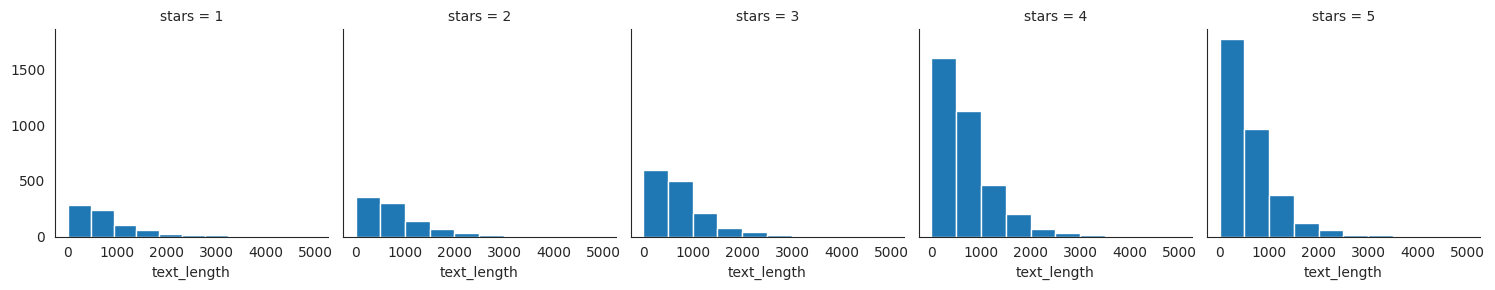

In [9]:
# Histogram of text length for each star rating using FacetGrid
g = sns.FacetGrid(df_yelp, col='stars')
g.map(plt.hist, 'text_length')
plt.show()


<ipython-input-10-2eae45dfd2a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='text_length', data=df_yelp, palette='rainbow')


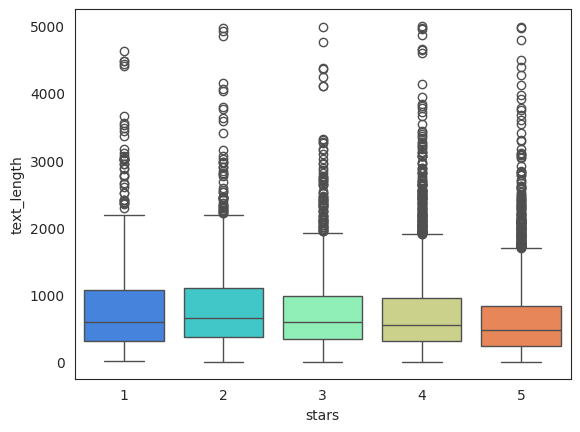

In [10]:
# Boxplot of text lengths across star ratings
sns.boxplot(x='stars', y='text_length', data=df_yelp, palette='rainbow')
plt.show()


<ipython-input-11-47dd430079d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df_yelp, palette='rainbow')


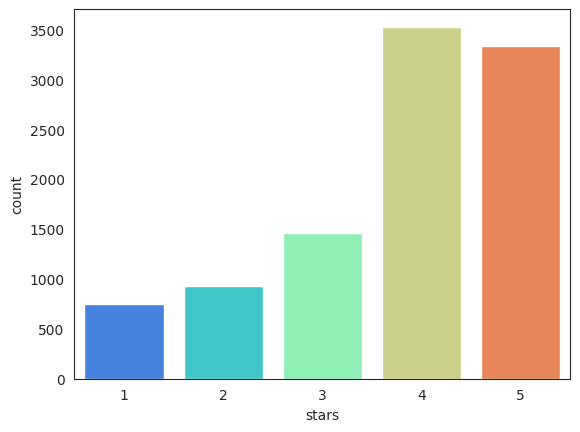

In [11]:
# Countplot for the number of reviews per star rating
sns.countplot(x='stars', data=df_yelp, palette='rainbow')
plt.show()


In [13]:
# Group the data by star rating and compute the mean of the numeric features
# Explicitly selecting numeric columns using select_dtypes
stars_mean = df_yelp.select_dtypes(include=np.number).groupby('stars').mean()
print(stars_mean)

# Compute the correlation matrix for these means
corr_matrix = stars_mean.corr()
print(corr_matrix)

           cool    useful     funny  text_length
stars                                           
1      0.576769  1.604806  1.056075   826.515354
2      0.719525  1.563107  0.875944   842.256742
3      0.788501  1.306639  0.694730   758.498289
4      0.954623  1.395916  0.670448   712.923142
5      0.944261  1.381780  0.608631   624.999101
                 cool    useful     funny  text_length
cool         1.000000 -0.743329 -0.944939    -0.857664
useful      -0.743329  1.000000  0.894506     0.699881
funny       -0.944939  0.894506  1.000000     0.843461
text_length -0.857664  0.699881  0.843461     1.000000


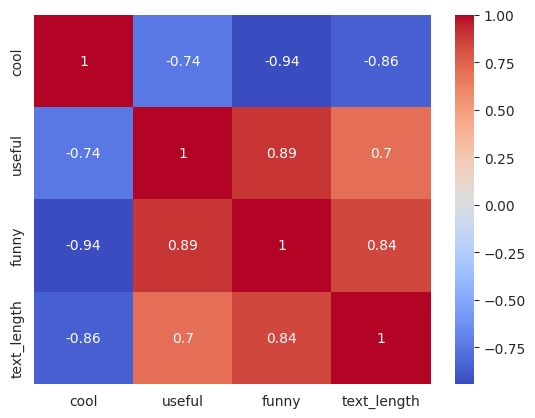

In [14]:
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


## 5. Preparing the Data for Classification

# We focus on reviews with only 1 or 5 stars.


In [15]:
# Select reviews that are either 1-star or 5-star
df_class = df_yelp[(df_yelp['stars'] == 1) | (df_yelp['stars'] == 5)]

# Separate the features (review text) and target (star rating)
X_text = df_class['text']
y_stars = df_class['stars']



## 6. Text Vectorization and Model Training (Direct Approach)

# We will first vectorize the text using CountVectorizer and train a Multinomial Naive Bayes classifier.


In [16]:
# Import CountVectorizer and transform the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X_text)


In [17]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_counts, X_test_counts, y_train, y_test = train_test_split(X_counts, y_stars, test_size=0.3, random_state=101)


In [18]:
# Train a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train_counts, y_train)


MultinomialNB()

In [19]:
# Evaluate the model on the test data
preds_counts = model_nb.predict(X_test_counts)

# Print evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, preds_counts))
print("\nClassification Report:\n", classification_report(y_test, preds_counts))


Confusion Matrix:
 [[159  69]
 [ 22 976]]

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## 7. Building a Pipeline with TF‑IDF Transformation

# We now create a pipeline that combines text vectorization, TF‑IDF transformation, and the Naive Bayes classifier.


In [20]:
# Import additional tools for TF-IDF and creating pipelines
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# Build the pipeline: count vectorization -> TF-IDF -> Naive Bayes classifier
text_clf_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),        # Convert text to token counts
    ('tfidf', TfidfTransformer()),              # Weight counts using TF-IDF
    ('classifier', MultinomialNB())             # Train with Naive Bayes
])


In [21]:
# Since our pipeline expects raw text, we need to re-split the original text data
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y_stars, test_size=0.3, random_state=101)


In [22]:
# Fit the pipeline on the training data (this might take a moment)
text_clf_pipeline.fit(X_train_text, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [23]:
# Use the pipeline to predict test data outcomes
preds_pipeline = text_clf_pipeline.predict(X_test_text)

# Print evaluation metrics for the pipeline
print("Pipeline Confusion Matrix:\n", confusion_matrix(y_test, preds_pipeline))
print("\nPipeline Classification Report:\n", classification_report(y_test, preds_pipeline))


Pipeline Confusion Matrix:
 [[  0 228]
 [  0 998]]

Pipeline Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 8. Final Thoughts

# In this project, we observed the entire workflow—from data loading and exploration, to text processing and classification.
# Although applying TF‑IDF in the pipeline may yield different performance, experimenting with different steps (such as modifying the vectorizer parameters
# or trying other classifiers) is a great way to deepen your understanding of NLP in action.
